<a href="https://colab.research.google.com/github/sanckle2/EDA/blob/main/climaproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En el actual proyecto se encuentran tres estaciones meteorológicas cerca de un destino de vacaciones: una en la costa, una en el interior y otra en las montañas. Nos gustaría encontrar una época del año en la que puedas explorar estas tres regiones sin que haga demasiado calor o demasiado frío.

**Objetivo**: 
-Visualizar y comparar los datos meteorológicos en estas tres ubicaciones. -Encontrar la época del año en que la temperatura media en todas las ubicaciones es superior a 55 grados e inferior a 85 grados Fahrenheit.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("weather_data.csv")
print(data.head())
print(data.tail())
print(data.info())


   station              DATE   tavg   tmax   tmin
0  CT_34A5  2019-01-01T00:00  43.99  51.98  35.54
1  CT_34A5  2019-01-01T01:00  43.14  51.72  35.70
2  CT_34A5  2019-01-01T02:00  43.16  52.11  35.29
3  CT_34A5  2019-01-01T03:00  42.93  52.39  35.13
4  CT_34A5  2019-01-01T04:00  42.99  52.06  35.16
       station              DATE   tavg   tmax   tmin
26275  MT_87AB  2019-12-31T19:00  53.45  67.19  32.27
26276  MT_87AB  2019-12-31T20:00  53.78  66.33  32.28
26277  MT_87AB  2019-12-31T21:00  53.41  66.46  31.86
26278  MT_87AB  2019-12-31T22:00  53.37  65.45  31.81
26279  MT_87AB  2019-12-31T23:00  53.72  64.98  31.75
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   station  26280 non-null  object 
 1   DATE     26280 non-null  object 
 2   tavg     26280 non-null  float64
 3   tmax     26280 non-null  float64
 4   tmin     26280 non-null  float64
dt

In [ ]:
print(data.isna().sum())
print(data.shape)

station    0
DATE       0
tavg       0
tmax       0
tmin       0
dtype: int64
(26280, 5)


In [ ]:
data["DATE"]=pd.to_datetime(data['DATE'], format='%Y-%m-%dT%H:%S')
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   station  26280 non-null  object        
 1   DATE     26280 non-null  datetime64[ns]
 2   tavg     26280 non-null  float64       
 3   tmax     26280 non-null  float64       
 4   tmin     26280 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 1.0+ MB
None
   station                DATE   tavg   tmax   tmin
0  CT_34A5 2019-01-01 00:00:00  43.99  51.98  35.54
1  CT_34A5 2019-01-01 01:00:00  43.14  51.72  35.70
2  CT_34A5 2019-01-01 02:00:00  43.16  52.11  35.29
3  CT_34A5 2019-01-01 03:00:00  42.93  52.39  35.13
4  CT_34A5 2019-01-01 04:00:00  42.99  52.06  35.16


Vamos a ver la información solo para estaciones de medición de la costa

<AxesSubplot:xlabel='DATE'>

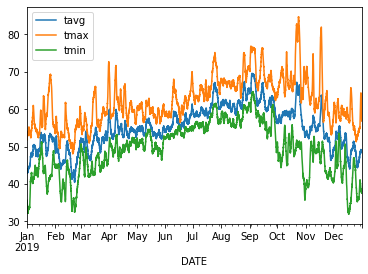

In [ ]:
coast=data.query('station=="CT_34A5"')
coast.plot(x="DATE")

<AxesSubplot:xlabel='DATE'>

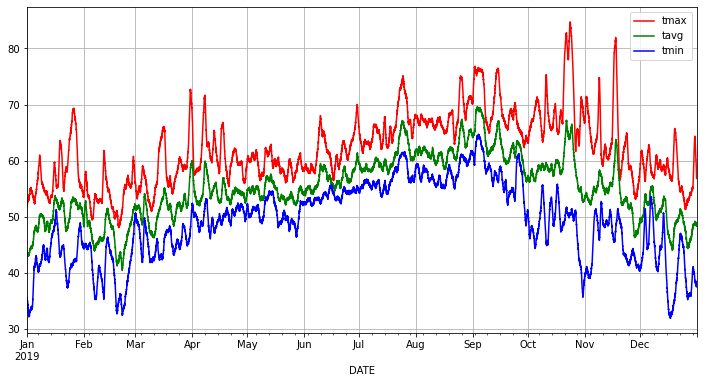

In [ ]:
coast.plot(x="DATE", y=["tmax", "tavg", "tmin"], color=["red", "green", "blue"], figsize=(12, 6), grid=True)

In [ ]:
data['DATE'] = data["DATE"].dt.floor(freq = 'D')
coast=data.query('station=="CT_34A5"')
coast_tmp_daily = coast.pivot_table(index="DATE")
print(coast_tmp_daily.head())

                 tavg       tmax       tmin
DATE                                       
2019-01-01  43.177083  52.727083  34.169583
2019-01-02  43.846250  54.132500  32.816250
2019-01-03  44.475000  54.622917  33.660000
2019-01-04  45.845833  53.402500  37.418750
2019-01-05  47.809167  53.282917  41.815833


<AxesSubplot:xlabel='DATE'>

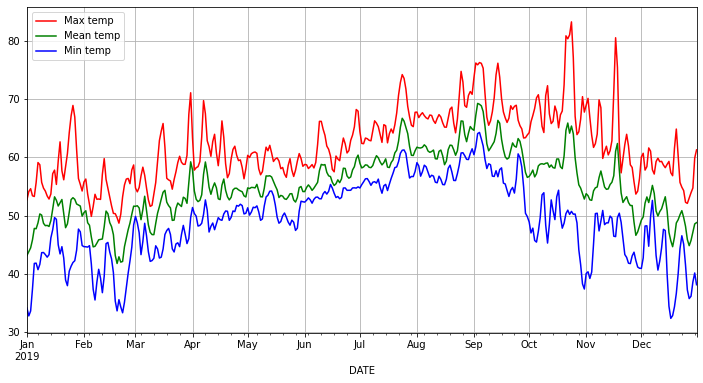

In [ ]:
coast_tmp_daily.plot(y=["tmax", "tavg", "tmin"], color=["red", "green", "blue"], 
            label=["Max temp", "Mean temp", "Min temp"], figsize=(12, 6), grid=True)

Text(0, 0.5, 'Average temp (F)')

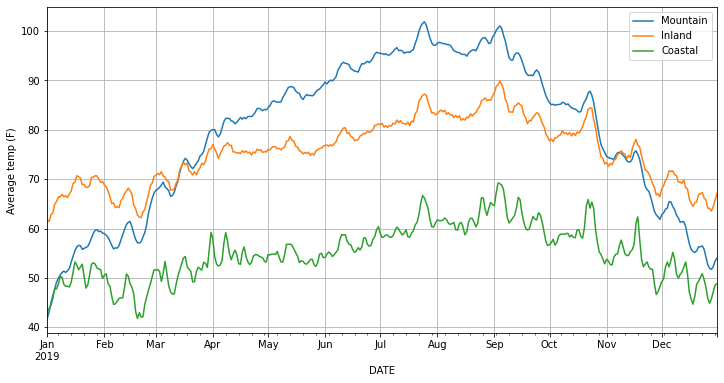

In [ ]:
ave_tmp_daily =pd.pivot_table(data, columns="station", values="tavg", index="DATE")
ave_tmp_daily.plot(y=["MT_87AB","IN_44B4","CT_34A5"], label=["Mountain", "Inland", "Coastal"], 
                   figsize=(12, 6), grid=True)
plt.ylabel("Average temp (F)")

In [ ]:
under_condition =   "IN_44B4 < @tmp_max and MT_87AB < @tmp_max and CT_34A5 < @tmp_max"
over_condition =    "IN_44B4 > @tmp_min and MT_87AB > @tmp_min and CT_34A5 > @tmp_min"

tmp_max =  85
tmp_min =  55
print('Días en que todas las regiones están por debajo de', tmp_max, 'grados:', len(ave_tmp_daily.query(under_condition)))
print('Días en que todas las regiones están por encima de', tmp_min, 'grados:', len(ave_tmp_daily.query(over_condition)))
print('Días en que todas las regiones están entre',tmp_min,'y',tmp_max,'grados:', len(ave_tmp_daily.query(under_condition + ' and ' + over_condition)))

Días en que todas las regiones están por debajo de 85 grados: 198
Días en que todas las regiones están por encima de 55 grados: 171
Días en que todas las regiones están entre 55 y 85 grados: 31


Hay 31 datos que coinciden con nuestro rango ideal para vacacionar, vamos a ver si corresponde a un mismo mes.

In [ ]:
data['month'] = data['DATE'].dt.month

In [ ]:
ave_tmp_monthly = data.pivot_table(values='tavg',index='month',columns='station')

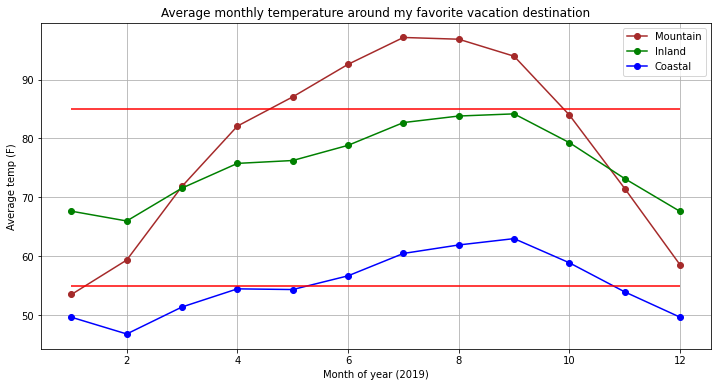

In [ ]:
ave_tmp_monthly.plot(y=['MT_87AB','IN_44B4','CT_34A5'],style='-o',figsize=(12,6),grid=True,
                   label=['Mountain','Inland','Coastal'], color=['brown','green','blue'], 
                     title= "Average monthly temperature around my favorite vacation destination")

# agrega etiquetas x e y
plt.ylabel("Average temp (F)")
plt.xlabel("Month of year (2019)")
# agrega líneas horizontales rojas, del 1 al 12, en tmp_min y tmp_max
plt.hlines(y= tmp_min, xmin = 1, xmax= 12, color = "r")
plt.hlines(y= tmp_max, xmin = 1, xmax= 12, color = "r")

**Conclusión:**
Los meses en los cuales las temperaturas están ideales en los tres sitios van desde el mes de octubr hasta principiosde noviembre